## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [19]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [20]:
df = pd.read_csv('data/StudentsPerformance.csv')

#### Show Top 5 Records

In [21]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

#### Preparing X and Y variables (X is independed features and Y is prediction)

### Here lets drop math socre and take all other fetures as independed features and predict math score

In [22]:

X = df.drop(columns=['math score'],axis=1)

In [23]:
X.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  reading score  writing score  
0                    none             72             74  
1               completed             90             88  
2                    none             95             93  
3                    none             57             44  
4                    none             78             75

In [24]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [27]:
y = df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [28]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

#The OneHotEncoder module is used to perform one-hot encoding on our categorical features, 
# while the StandardScaler module is used to perform standardscalar on our numerical features.
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# We use ColumnTransformer to combine one-hot encoding & standardscaling into a single transformer.
from sklearn.compose import ColumnTransformer

#initializing Standardscale and onehotencoder
numeric_transformer = StandardScaler() 
oh_transformer = OneHotEncoder()

#oh_transformer for categorical features
#numberical_transformer for numerical features
preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [29]:
# the model finds the mean and SD of each column of X using fit() These values are used to standardize the data when we call the transform()
# learning the appropriate scaling parameters to use when transforming our data to have zero mean and unit variance
X = preprocessor.fit_transform(X)

In [31]:
type(X)

numpy.ndarray

In [32]:
X.shape

(1000, 19)

In [33]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

#### Create an Evaluate Function to give all metrics after model Training

In [34]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [37]:
#lets create dictionary of regressor
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
#creating list of models
model_list = []
# creating list of R2 values
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i] #stored as list containing values of dictionary
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3274
- Mean Absolute Error: 4.2788
- R2 Score: 0.8741
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4096
- Mean Absolute Error: 4.2259
- R2 Score: 0.8797


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7122
- Mean Absolute Error: 4.5187
- R2 Score: 0.8553
-----------------------

### Results

In [39]:

# Create a list of tuples by Combining the two lists containing the model names and their R2 scores
model_r2_list = list(zip(model_list, r2_list))

# Create a new pandas DataFrame from the list of tuples, with columns for model name and R2 score
df = pd.DataFrame(model_r2_list, columns=['Model Name', 'R2_Score'])

# Sort the DataFrame by the R2_Score column in descending order
df_sorted = df.sort_values(by=["R2_Score"], ascending=False)


In [40]:
df_sorted

Model Name  R2_Score
2                    Ridge  0.880593
0        Linear Regression  0.879740
5  Random Forest Regressor  0.854058
7    CatBoosting Regressor  0.851632
8       AdaBoost Regressor  0.847244
1                    Lasso  0.825320
6             XGBRegressor  0.821589
3    K-Neighbors Regressor  0.783898
4            Decision Tree  0.722958

In [ ]:
#pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

## Linear Regression

In [43]:
# Creating a new linear regression model with an intercept term
lin_model = LinearRegression(fit_intercept=True)

# Training the model on the training data
lin_model = lin_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = lin_model.predict(X_test)

# Calculate the R2 score of the predictions, multiplied by 100 for a percentage
score = r2_score(y_test, y_pred) * 100

# Printing the accuracy score of the model
print("Accuracy of the model is %.2f" % score)


Accuracy of the model is 87.97


## Plot y_pred and y_test

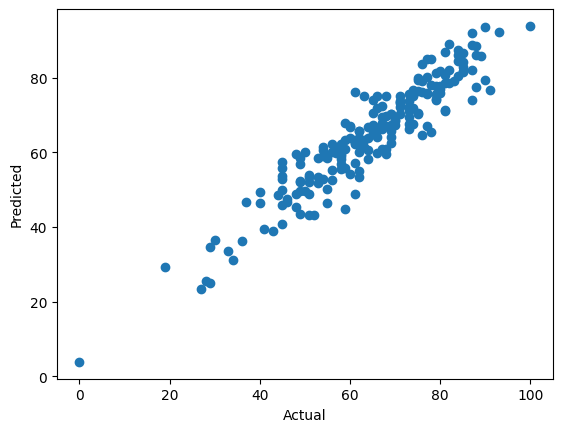

In [44]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

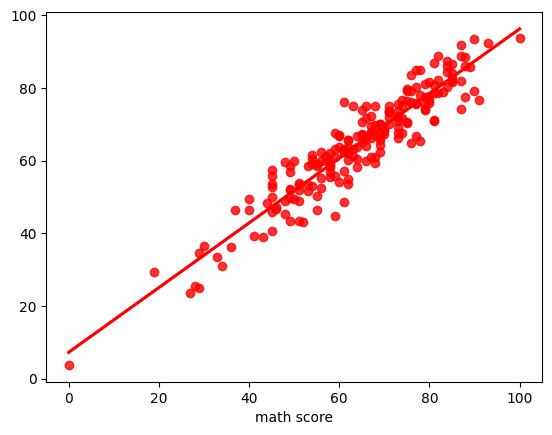

In [45]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [48]:
# Create a dictionary containing the actual and predicted values, and their difference
data = {'Actual Value': y_test, 'Predicted Value': y_pred, 'Difference': y_test - y_pred}

# Convert the dictionary to a pandas DataFrame
pred_df = pd.DataFrame(data)

pred_df


Actual Value  Predicted Value  Difference
521            91        76.703125   14.296875
737            53        58.578125   -5.578125
740            80        76.828125    3.171875
660            74        76.734375   -2.734375
411            84        87.484375   -3.484375
..            ...              ...         ...
408            52        43.125000    8.875000
332            62        62.109375   -0.109375
208            74        67.562500    6.437500
613            65        67.328125   -2.328125
78             61        62.312500   -1.312500

[200 rows x 3 columns]